In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.

Bad key "Microsoft YaHei" on line 210 in
C:\Users\tin89\Anaconda3\envs\ai\lib\site-packages\matplotlib\mpl-data\matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
((train_feature, train_label), (test_feature, test_label)) = cifar10.load_data()

170500096/170498071 [==============================] - 98s 1us/step


In [4]:
print( 'train feature datas =', train_feature.shape )

train feature datas = (50000, 32, 32, 3)


In [5]:
print( 'test feature datas =', test_feature.shape )

test feature datas = (10000, 32, 32, 3)


In [6]:
train_feature_vector = train_feature / 255

In [7]:
print( 'train feature vector datas =', train_feature_vector.shape )

train feature vector datas = (50000, 32, 32, 3)


In [8]:
from keras.utils import np_utils

In [9]:
train_label_onehot = np_utils.to_categorical(train_label)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
model = Sequential()

In [12]:
model.add( Conv2D( input_shape = (32, 32, 3)     # 輸入層為 (32, 32, 3) 的三維陣列
                 , filters = 8                   # 產生 8 個類似濾鏡效果的卷積圖片
                                                 # (值越大, 卷積圖片越多, 訓練越精準, 相對訓練時間也越久)
                 , kernel_size = (5, 5)          # 卷積圖片採用 5x5 filter weight 進行卷積運算
                 , padding = 'same'              # 卷積圖片大小與原始圖片一樣, 也就是 32x32
                 , activation = 'relu'           # 使用 relu 激活函數
                 )
         )

In [13]:
model.add( MaxPooling2D( pool_size = (2, 2) ) )

In [14]:
model.add( Flatten() )

In [15]:
model.add( Dense( units = 256                   # 隱藏層有 256 個神經元 (值越大, 訓練越精準, 相對訓練時間也越久)
                , kernel_initializer = 'normal' # 使用 normal 初始化 weight 權重與 bias 偏差值
                , activation = 'relu'           # 使用 relu 激活函數
                )
         )

In [16]:
model.add( Dense( units = 10                    # 輸出層有 10 個神經元 (因為數字只有 0 ~ 9)
                , kernel_initializer = 'normal' # 使用 normal 初始化 weight 權重與 bias 偏差值
                , activation = 'softmax'        # 使用 softmax 激活函數 (softmax 值越高, 代表機率越大)
                )
         )

In [17]:
model.compile( loss='categorical_crossentropy' # 設定 Loss 損失函數 為 categorical_crossentropy
             , optimizer = 'adam'              # 設定 Optimizer 最佳化方法 為 adam
             , metrics = ['accuracy']          # 設定 Model 評估準確率方法 為 accuracy
             )

In [26]:
history = model.fit(               # 訓練的歷史記錄, 會會回傳到指定變數 history
          x = train_feature_vector # 設定 圖片 Features 特徵值 (cifar10 提供 50000 筆資料)
        , y = train_label_onehot   # 設定 圖片 Label    真實值 (cifar10 提供 50000 筆資料)
        , validation_split = 0.2   # 設定 有多少筆驗證         (50000*0.2=10000 筆驗證, 50000*0.8=40000 筆訓練)
        , epochs = 30              # 設定 訓練次數             (值 10 以上,  值越大, 訓練時間越久, 但訓練越精準)
        , batch_size = 1000        # 設定 訓練時每批次有多少筆 (值 100 以上, 值越大, 訓練速度越快, 但需記憶體要夠大)
        , verbose = 2              # 是否 顯示訓練過程         (0: 不顯示, 1: 詳細顯示, 2: 簡易顯示)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 0.4273 - accuracy: 0.8696 - val_loss: 1.2335 - val_accuracy: 0.6221
Epoch 2/30
 - 9s - loss: 0.4212 - accuracy: 0.8715 - val_loss: 1.2298 - val_accuracy: 0.6238
Epoch 3/30
 - 8s - loss: 0.4107 - accuracy: 0.8755 - val_loss: 1.2538 - val_accuracy: 0.6204
Epoch 4/30
 - 9s - loss: 0.4065 - accuracy: 0.8758 - val_loss: 1.2775 - val_accuracy: 0.6140
Epoch 5/30
 - 9s - loss: 0.3931 - accuracy: 0.8808 - val_loss: 1.2748 - val_accuracy: 0.6183
Epoch 6/30
 - 9s - loss: 0.3821 - accuracy: 0.8864 - val_loss: 1.2867 - val_accuracy: 0.6181
Epoch 7/30
 - 10s - loss: 0.3716 - accuracy: 0.8890 - val_loss: 1.2928 - val_accuracy: 0.6203
Epoch 8/30
 - 10s - loss: 0.3664 - accuracy: 0.8930 - val_loss: 1.2922 - val_accuracy: 0.6202
Epoch 9/30
 - 11s - loss: 0.3550 - accuracy: 0.8976 - val_loss: 1.3145 - val_accuracy: 0.6160
Epoch 10/30
 - 11s - loss: 0.3443 - accuracy: 0.8995 - val_loss: 1.3052 - val_accuracy: 0.6196
Epoch 11/30
 - 

In [19]:
history = model.fit(               # 訓練的歷史記錄, 會會回傳到指定變數 history
          x = train_feature_vector # 設定 圖片 Features 特徵值 (cifar10 提供 50000 筆資料)
        , y = train_label_onehot   # 設定 圖片 Label    真實值 (cifar10 提供 50000 筆資料)
        , validation_split = 0.2   # 設定 有多少筆驗證         (50000*0.2=10000 筆驗證, 50000*0.8=40000 筆訓練)
        , epochs = 30              # 設定 訓練次數             (值 10 以上,  值越大, 訓練時間越久, 但訓練越精準)
        , batch_size = 1000        # 設定 訓練時每批次有多少筆 (值 100 以上, 值越大, 訓練速度越快, 但需記憶體要夠大)
        , verbose = 2              # 是否 顯示訓練過程         (0: 不顯示, 1: 詳細顯示, 2: 簡易顯示)
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 12s - loss: 0.8209 - accuracy: 0.7181 - val_loss: 1.1156 - val_accuracy: 0.6177
Epoch 2/30
 - 12s - loss: 0.8110 - accuracy: 0.7207 - val_loss: 1.1552 - val_accuracy: 0.5980
Epoch 3/30
 - 12s - loss: 0.7928 - accuracy: 0.7300 - val_loss: 1.1126 - val_accuracy: 0.6132
Epoch 4/30
 - 12s - loss: 0.7748 - accuracy: 0.7354 - val_loss: 1.1011 - val_accuracy: 0.6234
Epoch 5/30
 - 12s - loss: 0.7617 - accuracy: 0.7415 - val_loss: 1.1039 - val_accuracy: 0.6201
Epoch 6/30
 - 12s - loss: 0.7450 - accuracy: 0.7490 - val_loss: 1.1132 - val_accuracy: 0.6188
Epoch 7/30
 - 12s - loss: 0.7349 - accuracy: 0.7503 - val_loss: 1.1146 - val_accuracy: 0.6181
Epoch 8/30
 - 12s - loss: 0.7178 - accuracy: 0.7566 - val_loss: 1.1090 - val_accuracy: 0.6228
Epoch 9/30
 - 12s - loss: 0.7060 - accuracy: 0.7624 - val_loss: 1.1167 - val_accuracy: 0.6216
Epoch 10/30
 - 12s - loss: 0.6825 - accuracy: 0.7717 - val_loss: 1.1210 - val_accuracy: 0.6220
Epoch 11/

In [21]:
import matplotlib.pyplot as plot

In [23]:
def train_history_graphic( history       # 資料集合
                         , history_key1  # 資料集合裡面的來源 1 (有 loss, acc, val_loss, val_acc 四種)
                         , history_key2  # 資料集合裡面的來源 2 (有 loss, acc, val_loss, val_acc 四種)
                         , y_label       # Y 軸標籤文字
                         ) :
    # 資料來源 1
    plot.plot( history.history[history_key1] )

    # 資料來源 2
    plot.plot( history.history[history_key2] )

    # 標題
    plot.title( 'train history' )

    # X 軸標籤文字
    plot.xlabel( 'epochs' )

    # Y 軸標籤文字
    plot.ylabel( y_label )

    # 設定圖例
    # (參數 1 為圖例說明, 有幾個資料來源, 就對應幾個圖例說明)
    # (參數 2 為圖例位置, upper 為上面, lower 為下面, left 為左邊, right 為右邊)
    plot.legend( ['train', 'validate']
               , loc = 'upper left'
               )

    # 顯示畫布
    plot.show()

In [25]:
train_history_graphic( history, 'acc', 'val_acc', 'accuracy' )

KeyError: 'acc'

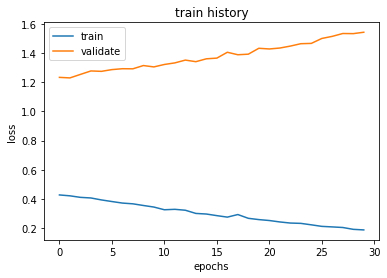

In [27]:
train_history_graphic( history, 'loss', 'val_loss', 'loss' )

In [28]:
test_feature_vector = test_feature / 255

In [29]:
test_label_onehot = np_utils.to_categorical(test_label)

In [30]:
eval = model.evaluate( test_feature_vector, test_label_onehot )

10000/10000 [==============================] - 1s 103us/step


In [31]:
print( 'loss =', eval[0] )
print( 'accuracy =', eval[1] )

loss = 1.56768216381073
accuracy = 0.6050999760627747


In [32]:
prediction = model.predict_classes( test_feature )

In [33]:
print( prediction )
print( prediction[340:360] )

[3 1 0 ... 5 5 7]
[4 5 2 0 8 5 7 5 8 8 9 9 8 2 2 5 5 5 1 8]


In [34]:
label_desc = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck' ]

In [35]:
prediction_desc = list( map( lambda x : label_desc[x], prediction ) )

In [36]:
print( prediction_desc[340:360] )

['deer', 'dog', 'bird', 'airplane', 'ship', 'dog', 'horse', 'dog', 'ship', 'ship', 'truck', 'truck', 'ship', 'bird', 'bird', 'dog', 'dog', 'dog', 'automobile', 'ship']


In [37]:
import pandas as pd

# Pandas.DataFrame 的資料集需要一維陣列, 而 test_label 本身是二維陣列, 需透過 reshape 轉換為一維陣列
test_label_onearr = test_label.reshape(len(test_label))

checkList = pd.DataFrame( {'label':test_label_onearr       # Column1 名稱: 欄位值集合 (這裡提供 Label 真實數值)
                          ,'prediction':prediction  # Column2 名稱: 欄位值集合 (這裡提供 AI 預測結果)
                          }
                        )

# 顯示對照表前 10 筆結果
print( checkList[0:10] )

   label  prediction
0      3           3
1      8           1
2      8           0
3      0           8
4      6           3
5      6           3
6      1           1
7      6           9
8      3           5
9      1           1


In [38]:
checkList[ checkList.prediction != checkList.label ]

,label,prediction
1,8,1
2,8,0
3,0,8
4,6,3
5,6,3
...,...,...
9986,8,0
9987,0,8
9989,2,4
9993,5,3


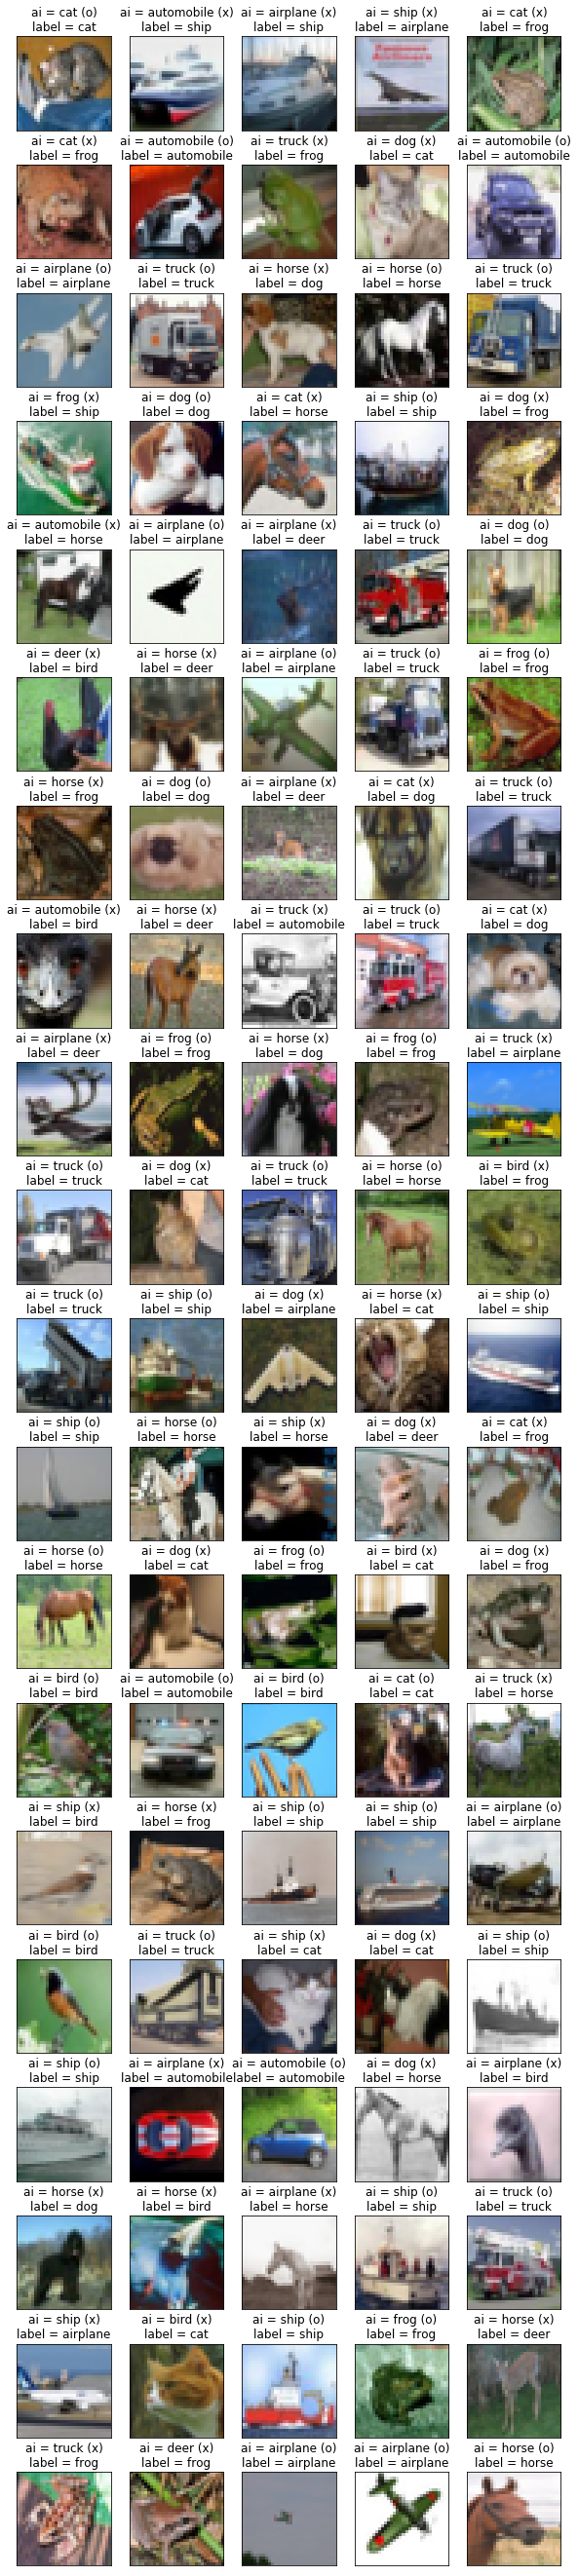

In [47]:
import matplotlib.pyplot as plot 
import math

def show_feature_label_prediction( features
                                 , labels
                                 , predictions
                                 , indexList 
                                 ) :

    num = len(indexList)

    plot.gcf().set_size_inches( 2*5, (2+0.4)*math.ceil(num/5) )

    loc = 0
    for i in indexList :

     
        loc += 1

        subp = plot.subplot( math.ceil(num/5), 5, loc )

        subp.imshow( features[i], cmap='binary' )

   
        if( len(predictions) > 0 ) :
            title = 'ai = ' + label_desc[ predictions[i] ]
            title += (' (o)' if predictions[i]==labels[i] else ' (x)') # 預測正確顯示(o), 錯誤顯示(x)
            title += '\nlabel = ' + label_desc[ labels[i] ]
       
        else :
            title = 'label = ' + label_desc[ labels[i] ]

      
        subp.set_title( title, fontsize=12 )

        subp.set_xticks( [] )
        subp.set_yticks( [] )

    plot.show()

# 從測試資料集第 0 位置, 顯示 10 個資料的圖片, 真實數值, 與預測結果

show_feature_label_prediction( test_feature, test_label_onearr, prediction, range(0, 100) )

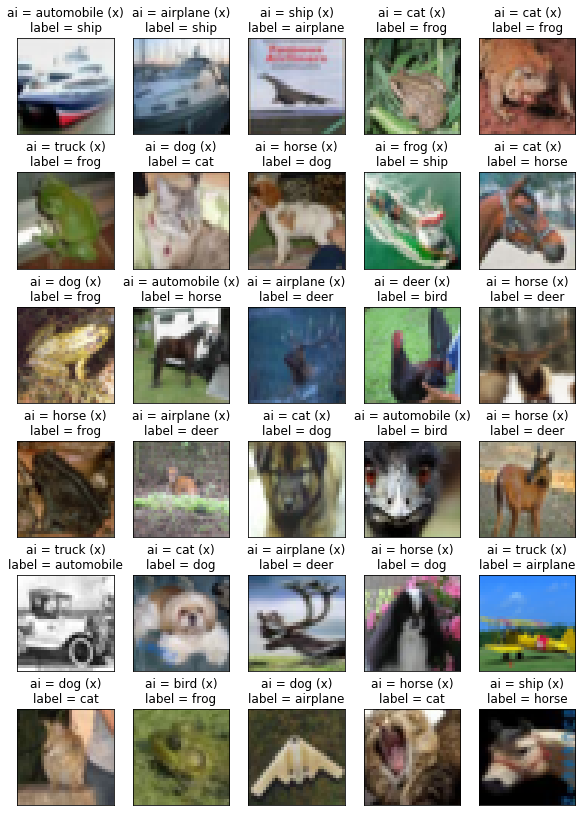

In [48]:
show_feature_label_prediction( test_feature
                             , test_label_onearr
                             , prediction
                             , checkList.index[checkList.prediction != checkList.label][0:30]
                             )

In [43]:
from keras.models import load_model

model = load_model('C://Users//tin89//ai//my_cifar10_cnn_model.h5')

OSError: Unable to open file (unable to open file: name = 'C://Users//tin89//ai//my_cifar10_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)